In [1]:
import os
os.chdir('/data/l989o/deployed/a')
import sys
if '/data/l989o/a' in sys.path:
    sys.path.remove('/data/l989o/a')

In [183]:
from data import RawMeanDataset, RawMean12, NatureBImproved, NatureBOriginal, TransformedMeanDataset
import h5py
from data import file_path
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch
import matplotlib
import shutil

In [23]:
class A:
    def __init__(self, model, model_id):
        self.model = model
        self.model_id = model_id
        self.instance = model + '_' + model_id
        if self.model_id == 'raw_mean_dataset':
            self.dataset = RawMeanDataset
        elif self.model_id == 'raw_mean12':
            self.dataset = RawMean12
        elif self.model_id == 'nature_b_improved':
            self.dataset = NatureBImproved
        elif self.model_id == 'nature_b_original':
            self.dataset = NatureBOriginal
        elif self.model_id == 'transformed_mean_dataset':
            self.dataset = TransformedMeanDataset
        else:
            raise ValueError(self.instance)
        self.ds_train = self.dataset('train')
        self.ds_validation = self.dataset('validation')

instances = [A('model_name', 'raw_mean_dataset'), A('vae', 'raw_mean12'), A('vae', 'nature_b_improved'), A('vae', 'nature_b_original'), A('vae', 'transformed_mean_dataset')]

for i, ii in enumerate(instances):
    print(i, ii.instance)

100%|██████████| 45/45 [00:00<00:00, 276.79it/s]


0 model_name_raw_mean_dataset
1 vae_raw_mean12
2 vae_nature_b_improved
3 vae_nature_b_original
4 vae_transformed_mean_dataset


In [6]:
i0 = instances[0]
i4 = instances[4]

In [20]:
all_k = set()
for instance in instances:
    o_train = instance.ds_train.filenames     
    l = []
    for i, o in enumerate(tqdm(o_train, desc='train')):
        original = instance.ds_train[i]
        l.append(original.clone())
    instance.x_train = torch.cat(l, dim=0)
    
    o_validation = instance.ds_validation.filenames
    l = []
    for i, o in enumerate(tqdm(o_validation, desc='validation')):
        original = instance.ds_validation[i]
        l.append(original.clone())
    instance.x_validation = torch.cat(l, dim=0)

validation: 100%|██████████| 45/45 [00:00<00:00, 183.88it/s]


In [142]:
print(len(i0.x_train))

762354


# Cells distributions

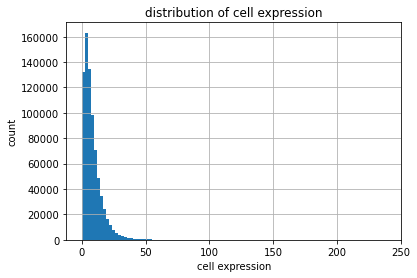

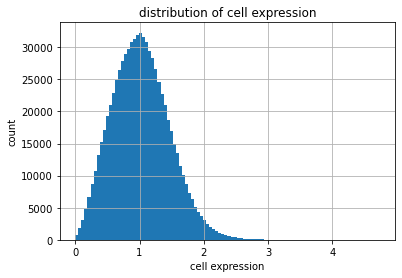

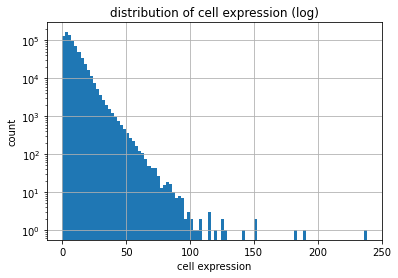

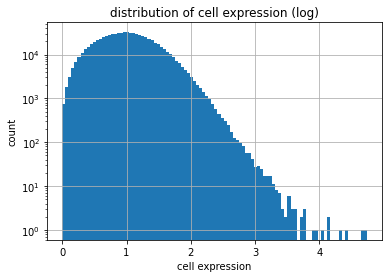

In [144]:
_ = plt.hist(i0.x_train[:, 0].numpy(), bins=100)
plt.grid()
plt.title('distribution of cell expression')
plt.xlabel('cell expression')
plt.ylabel('count')
plt.show()

_ = plt.hist(i4.x_train[:, 0].numpy(), bins=100)
plt.grid()
plt.title('distribution of cell expression')
plt.xlabel('cell expression')
plt.ylabel('count')
plt.show()

_ = plt.hist(i0.x_train[:, 0].numpy(), bins=100)
plt.yscale('log')
plt.grid()
plt.title('distribution of cell expression (log)')
plt.xlabel('cell expression')
plt.ylabel('count')
plt.show()

_ = plt.hist(i4.x_train[:, 0].numpy(), bins=100)
plt.yscale('log')
plt.grid()
plt.title('distribution of cell expression (log)')
plt.xlabel('cell expression')
plt.ylabel('count')
plt.show()

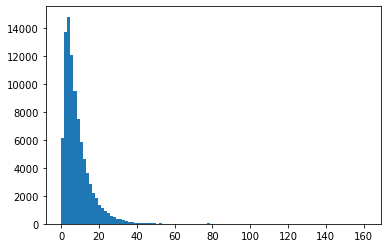

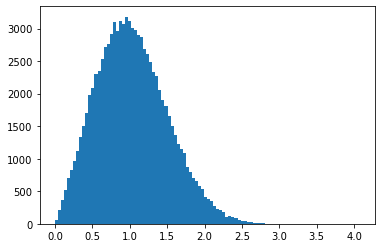

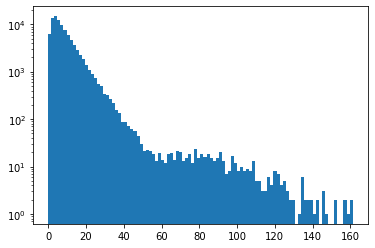

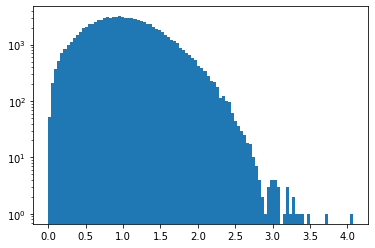

In [39]:
_ = plt.hist(i0.x_validation[:, 0].numpy(), bins=100)
plt.show()

_ = plt.hist(i4.x_validation[:, 0].numpy(), bins=100)
plt.show()

_ = plt.hist(i0.x_validation[:, 0].numpy(), bins=100)
plt.yscale('log')
plt.show()

_ = plt.hist(i4.x_validation[:, 0].numpy(), bins=100)
plt.yscale('log')
plt.show()

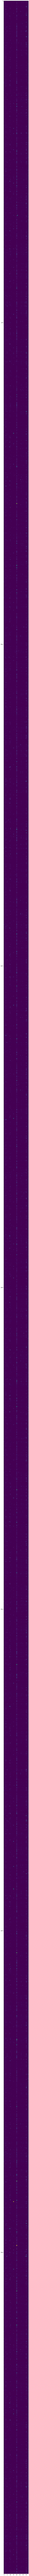

In [59]:
x = i0.x_train
l = len(x)
r = np.random.choice(l, 4000)

plt.figure(figsize=(10, 500))
plt.imshow(x[r, :])
plt.show()

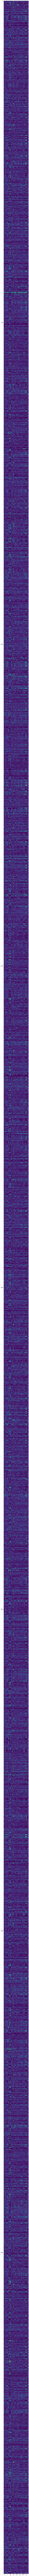

In [60]:
x = i4.x_train

l = len(x)
r = np.random.choice(l, 4000)

plt.figure(figsize=(10, 500))
plt.imshow(x[r, :])
plt.show()

# Movies

In [217]:
import glob
from PIL import Image
import os
print(os.getcwd())
print(file_path('movies'))
shutil.rmtree(file_path('movies/0'))
shutil.rmtree(file_path('movies/4'))
os.makedirs(file_path('movies'), exist_ok=True)
os.makedirs(file_path('movies/0'), exist_ok=True)
os.makedirs(file_path('movies/4'), exist_ok=True)

In [260]:
matplotlib.use('Agg')
n = 30
ff = i0.ds_train.filenames
np.random.seed(2)
r = np.random.choice(len(ff), n, replace=False)
xxxxx = i0.x_train.numpy()
c999 = np.quantile(xxxxx, 0.999)
for i, rr in enumerate(r):
    o = ff[rr]
    x = i0.ds_train[rr]
    rrr = np.random.choice(len(x), min(len(x), 150), replace=False)
    x = x[rrr, :]
    y = len(x)
    fig = plt.figure(figsize=(3 + 1.2, y / 39 * 3))
    plt.imshow(x, interpolation='none')
    f = file_path(f'movies/0/{i:04d}.png')
    plt.title(f'ome {rr}')
    plt.xlabel('channel')
    plt.ylabel('cell')
    plt.clim((0, c999))
    plt.colorbar()
    plt.suptitle('plotting 150 random cells from random omes\ncolorbar clipped at quantile 0.999')#, y=0.995)
    plt.tight_layout() #rect=[0, 0, 1, 0.95])
    plt.savefig(f, bbox_inches='tight', dpi=300) #, bbox_extra_artists=(suptitle, ))
#     plt.show()
    plt.close(fig)
%matplotlib inline

In [265]:
matplotlib.use('Agg')
n = 30
ff = i4.ds_train.filenames
np.random.seed(2)
c_min, c_max = torch.min(i4.x_train).item(), torch.max(i4.x_train).item()
r = np.random.choice(len(ff), n, replace=False)
for i, rr in enumerate(r):
    o = ff[rr]
    x = i4.ds_train[rr]
    rrr = np.random.choice(len(x), min(len(x), 150), replace=False)
    x = x[rrr, :]
    y = len(x)
    fig = plt.figure(figsize=(3 + 1.2, y / 39 * 3))
    plt.imshow(x, interpolation='none')
    f = file_path(f'movies/4/{i:04d}.png')
    plt.title(f'ome {rr}')
    plt.xlabel('channel')
    plt.ylabel('cell')
    plt.clim((c_min, c_max))
    plt.colorbar()
    plt.suptitle('plotting 150 random cells from random omes\n')#, y=0.995)
    plt.tight_layout()
    plt.savefig(f, bbox_inches='tight', dpi=300)
    plt.close(fig)
%matplotlib inline

In [267]:
fp_in = file_path('movies/0/*.png')
fp_out = file_path('movies/0.gif')

img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=1000, loop=0)

fp_in = file_path('movies/4/*.png')
fp_out = file_path('movies/4.gif')

img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=1000, loop=0)

# Back to cells distirbutions

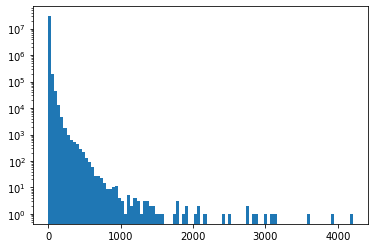

0.0181818176060915
0.06468293070793152


In [113]:
x = i0.x_train.numpy()

plt.figure()
plt.hist(x.flatten(), bins=100)
plt.yscale('log')
plt.show()

print(np.quantile(x.flatten(), 0.02))
print(np.quantile(x.flatten(), 0.09))

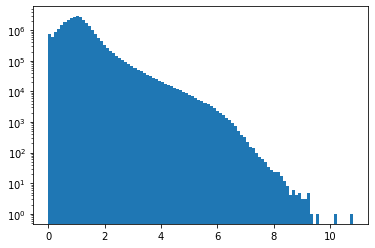

0.06644641682505606


In [111]:
x = i4.x_train.numpy()

plt.figure()
plt.hist(x.flatten(), bins=100)
plt.yscale('log')
plt.show()


print(np.quantile(x.flatten(), 0.02))

In [80]:
x0 = i0.x_train.numpy()
x4 = i4.x_train.numpy()

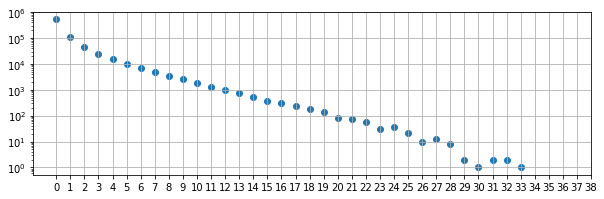

In [119]:
q = np.quantile(x0.flatten(), 0.02)
a = np.sum(x0 <= q, axis=1)
plt.figure(figsize=(10, 3))
u, c = np.unique(a, return_counts=True)
plt.scatter(u, c)
plt.yscale('log')
plt.xticks(list(range(39)))
plt.grid()
plt.show()

[5.07692308e+00 2.07435897e+01 4.51615385e+02 8.46153846e-01
 9.87948718e+01 2.71230769e+02 2.10717949e+02 2.53717949e+02
 7.50948718e+02 1.90692308e+02 6.29384615e+02 1.70589744e+02
 7.09230769e+01 1.10569231e+03 2.41692308e+02 2.56641026e+02
 4.09974359e+02 7.87179487e+02 2.20256410e+01 1.15771795e+03
 5.12820513e-02 4.72564103e+01 7.77948718e+02 4.77743590e+02
 1.16284615e+03 5.54076923e+02 7.70000000e+01 2.12820513e+01
 1.15487179e+03 7.27435897e+01 1.94871795e+00 2.15102564e+02
 1.01905128e+03 1.86666667e+01 2.14712821e+03 3.70051282e+02
 5.04871795e+01 1.18717949e+01 3.15384615e+00]


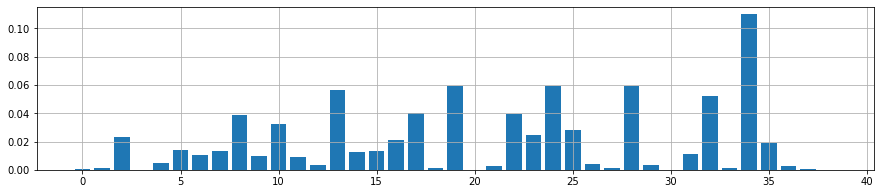

In [140]:
q = np.quantile(x0.flatten(), 0.02)
a = np.sum(x0 <= q, axis=0)
print(a / len(a))
plt.figure(figsize=(15, 3))
plt.bar(np.arange(39), a / len(x0))
# plt.yscale('log')
plt.grid()
plt.show()

In [120]:
len(x0.flatten()[x0.flatten() <= q]) / len(x0.flatten())

0.020055626624228613

In [118]:
a = x0.flatten()
print(len(a))
q = np.quantile(a, 0.02)
print(q)
print(np.sum(a <= q) / len(a))
print(len(a[a <= q]) / len(a))

29731806
0.0181818176060915
0.020055626624228613
0.020055626624228613


0.06644641682505606


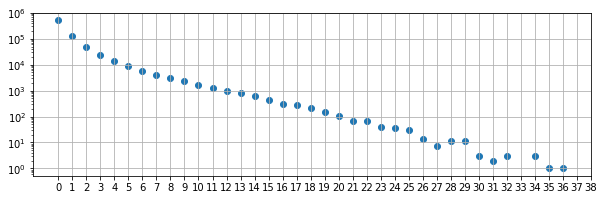

In [121]:
q = np.quantile(x4.flatten(), 0.02)
print(q)
a = np.sum(x4 <= q, axis=1)
plt.figure(figsize=(10, 3))
u, c = np.unique(a, return_counts=True)
plt.scatter(u, c)
plt.yscale('log')
plt.xticks(list(range(39)))
plt.grid()
plt.show()

# Raw data distributions

In [286]:
from data import OmeDataset
ds = OmeDataset('train')
print(len(ds))
ds[1].shape

389


torch.Size([421, 833, 39])

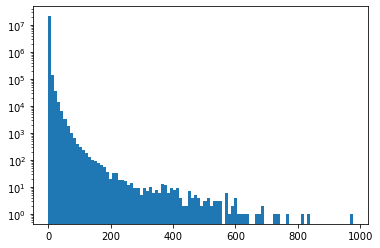

In [295]:
plt.hist(ds[0].numpy().flatten(), bins=100)
plt.yscale('log')
plt.show()

In [287]:
l = []
for d in tqdm(ds, desc='concatenating all pixels'):
    v = d.numpy().flatten()
    l.append(v)

In [334]:
s = 0
for ll in l:
    s += len(ll)
s

6005140245

In [291]:
big_min = 1000000
big_max = -1
for ll in l:
    big_min = min(big_min, np.min(ll))
    big_max = max(big_max, np.max(ll))

In [296]:
big_min, big_max

(0.0, 45857.688)

In [328]:
a = np.arange(0, big_max, 10).tolist()
# b = np.arange(10000, big_max, 5000).tolist()
# print(a)
# print()
# print(b)
# print()
# bins = np.array(a + b)
bins = np.array(a)
# print(bins.tolist())

In [331]:
my_hist = np.zeros(len(bins) - 1, dtype='int32')
for ll in tqdm(l, desc='computing histogram'):
    h, c = np.histogram(ll, bins)
#     print(h)
#     print(c)
    my_hist += h

computing histogram: 100%|██████████| 389/389 [02:08<00:00,  3.04it/s]


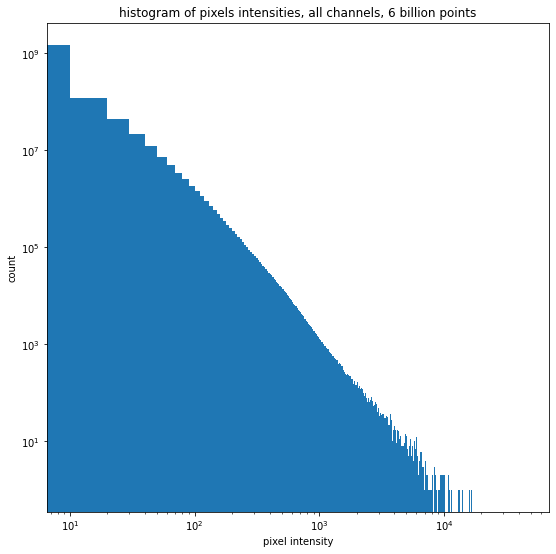

In [339]:
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(9, 9))
plt.bar(center, my_hist, align='center', width=width)
plt.title('histogram of pixels intensities, all channels, 6 billion points')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('pixel intensity')
plt.ylabel('count')
plt.show()

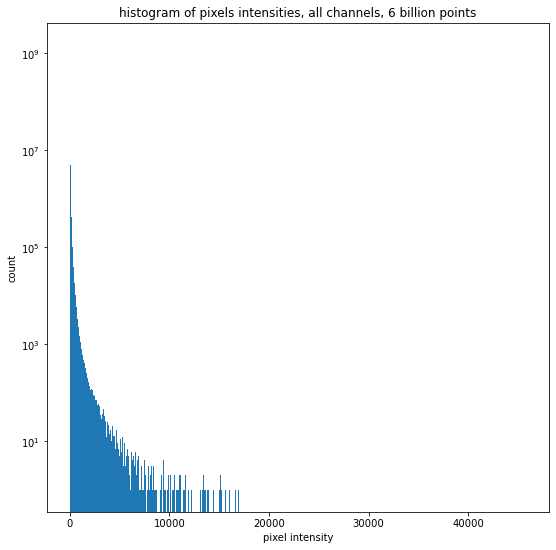

In [340]:
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(9, 9))
plt.bar(center, my_hist, align='center', width=width)
plt.title('histogram of pixels intensities, all channels, 6 billion points')
plt.yscale('log')
plt.xlabel('pixel intensity')
plt.ylabel('count')
plt.show()